In [12]:
# Load data
import pandas as pd

train_df = pd.read_csv("C:\\Users\\fsthilaire\Desktop\hd_energy_test\\data\\raw\\train_data.csv")
test_df = pd.read_csv("C:\\Users\\fsthilaire\\Desktop\\hd_energy_test\\data\\raw\\test_data.csv")


In [13]:
# Train isolation forest
from sklearn.ensemble import IsolationForest

X_train = train_df[['enthalpy', 'energy']]


model = IsolationForest(contamination='auto', random_state=42)
model.fit(X_train)

IsolationForest(random_state=42)

In [14]:
# Append model predictions
X_test = test_df[['enthalpy', 'energy']]
y_pred = model.predict(X_test)
test_df['anomaly'] = y_pred

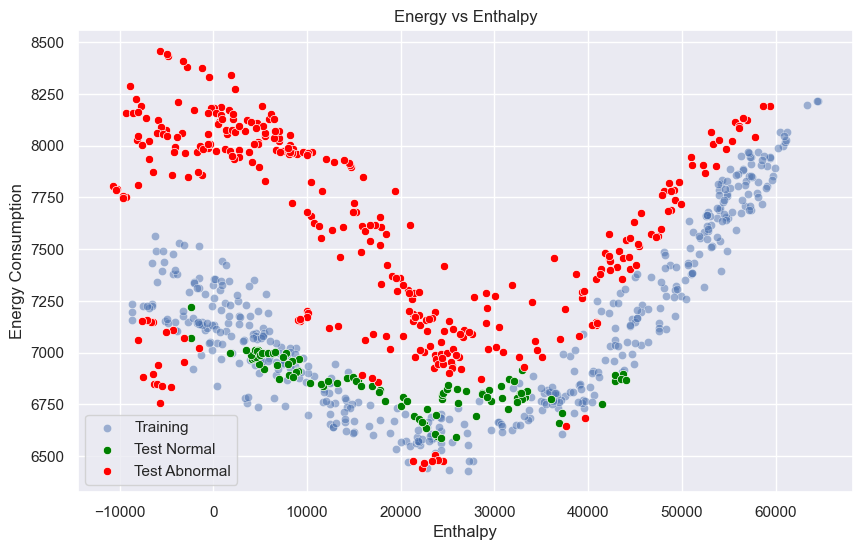

In [15]:
# Visual Assessment
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
fig = plt.subplots(figsize=(10, 6))

ax1 = sns.scatterplot(data = train_df, x = 'enthalpy', y = 'energy', label = 'Training', alpha = 0.5)
ax2 = sns.scatterplot(data = test_df[test_df.anomaly == 1], x = 'enthalpy', y = 'energy', label = 'Test Normal', color = 'green')
ax3 = sns.scatterplot(data = test_df[test_df.anomaly == -1], x = 'enthalpy', y = 'energy', label = 'Test Abnormal', color = 'red')
plt.xlabel("Enthalpy")
plt.ylabel("Energy Consumption")
_ = plt.title('Energy vs Enthalpy')

## Remarks
- The model seems to perform well at detecting anomalies relative to the training data
- Post-processing is needed to only flag the abnormally high energy consumption, and not the abnormally low

## Polynomial Fit


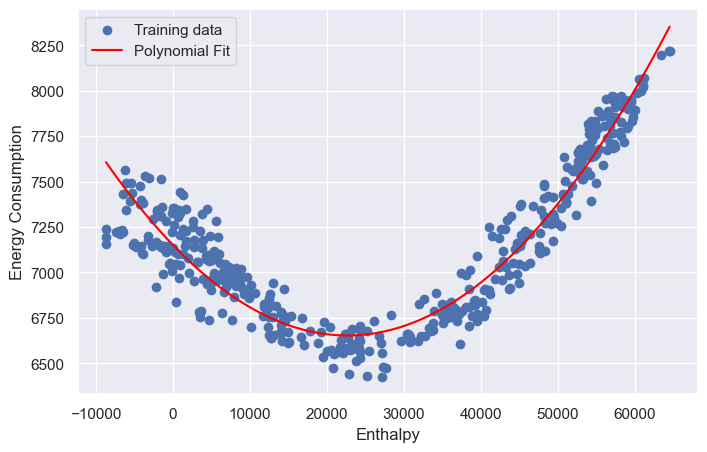

In [16]:
# Polynomial fit on training ata to filter "abnormally low" energy from data points flagged as abnormal

import numpy as np
x = train_df["enthalpy"]
y = train_df["energy"]
poly_fit = np.poly1d(np.polyfit(x, y, 2))

x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = poly_fit(x_fit)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Training data")
plt.plot(x_fit, y_fit, color="red", label="Polynomial Fit")
plt.xlabel("Enthalpy")
plt.ylabel("Energy Consumption")
plt.legend()




In [17]:
# Set lower energy consumption as normal
test_df['poly_fit'] = poly_fit(test_df['enthalpy'])
test_df.loc[test_df.energy < test_df.poly_fit, 'anomaly'] = 1


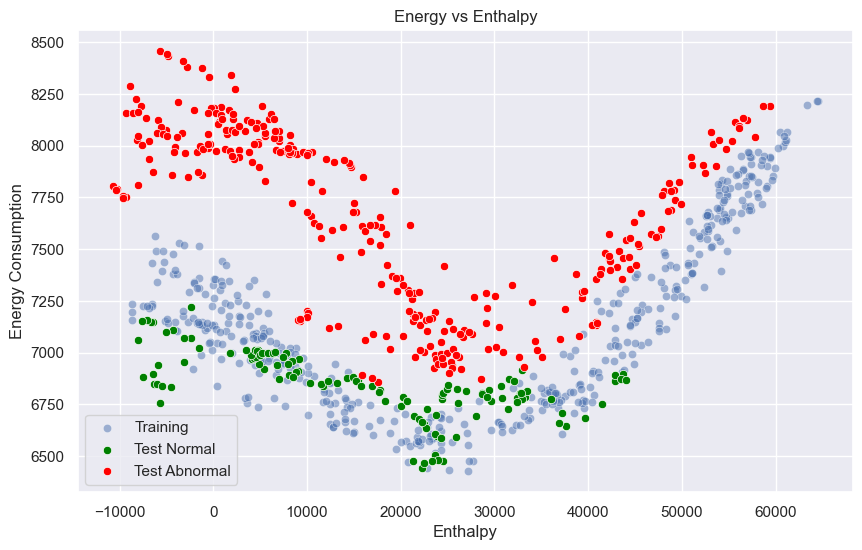

In [18]:
# Visual Assessment
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
fig = plt.subplots(figsize=(10, 6))

ax1 = sns.scatterplot(data = train_df, x = 'enthalpy', y = 'energy', label = 'Training', alpha = 0.5)
ax2 = sns.scatterplot(data = test_df[test_df.anomaly == 1], x = 'enthalpy', y = 'energy', label = 'Test Normal', color = 'green')
ax3 = sns.scatterplot(data = test_df[test_df.anomaly == -1], x = 'enthalpy', y = 'energy', label = 'Test Abnormal', color = 'red')
plt.xlabel("Enthalpy")
plt.ylabel("Energy Consumption")
_ = plt.title('Energy vs Enthalpy')

## Summary

- Isolation forest model + polynomial fit post processing seems to work well based on visual assessment
- Could play around with contamination parameter to adjust sensitivity


In [19]:
# Save model

import pickle


with open('C:\\Users\\fsthilaire\\Desktop\\hd_energy_test\\src\\models\\isolation_forest.pkl', 'wb') as f:
    pickle.dump(model, f)

In [20]:
# Save Polynomial coefficients

coeffs = poly_fit.coefficients
np.save('C:\\Users\\fsthilaire\\Desktop\\hd_energy_test\\src\\models\\poly_coeffs.npy', coeffs)